In [1]:
using Pkg
Pkg.add("MLJ")
Pkg.add("TimeSeries")
Pkg.add("DataFrames")
Pkg.add("StatsBase")
Pkg.add("MLJLinearModels")
Pkg.add("Plots")

   Resolving package versions...
   Installed CategoricalDistributions ─ v0.1.13
   Installed InitialValues ──────────── v0.3.1
   Installed StatisticalTraits ──────── v3.2.0
   Installed ProgressMeter ──────────── v1.9.0
   Installed ContextVariablesX ──────── v0.1.3
   Installed LearnAPI ───────────────── v0.1.0
   Installed EarlyStopping ──────────── v0.3.0
   Installed NNlib ──────────────────── v0.9.8
   Installed ShowCases ──────────────── v0.1.0
   Installed IterationControl ───────── v0.5.3
   Installed MLJModels ──────────────── v0.16.12
   Installed PrettyPrint ────────────── v0.2.0
   Installed FLoopsBase ─────────────── v0.1.1
   Installed MLJFlow ────────────────── v0.2.0
   Installed MicroCollections ───────── v0.1.4
   Installed StatisticalMeasures ────── v0.1.3
   Installed MLJIteration ───────────── v0.6.0
   Installed LLVM ───────────────────── v6.4.1
   Installed NameResolution ─────────── v0.1.5
   Installed PrettyPrinting ─────────── v0.4.1
   Installed DefineSingl

In [19]:
using MLJ
using TimeSeries
using DataFrames
using StatsBase
using MLJLinearModels
# Simulating data for solar activity and geomagnetic field changes
using Random
using Plots

In [10]:
Random.seed!(123)  # Setting seed for reproducibility

years = collect(1:100)
solar_activity = rand(100) .* 100
geomagnetic_changes = sin.(π .* years ./ 10) .* 50 .+ randn(100) .* 10

# Simulated data for climate variations (target)
climate_variations = (solar_activity .* 0.3) .+ (geomagnetic_changes .* 0.5) .+ randn(100) .* 20

# Creating a DataFrame from the data
data = DataFrame(
    Year = years,
    Solar_Activity = solar_activity,
    Geomagnetic_Changes = geomagnetic_changes,
    Climate_Variations = climate_variations
)

# Splitting the data into features (X) and target variable (y)
X = data[:, ["Solar_Activity", "Geomagnetic_Changes"]]
y = data[:, "Climate_Variations"]

100-element Vector{Float64}:
  38.97394063035618
 -14.303619965521651
  56.598201415975105
  39.0639082794893
  31.907443083145324
  49.07423773795412
  52.44421730652914
  18.5464254281964
  16.201604639972103
 -29.32828295711294
  37.638979452624326
 -39.534214923977274
 -61.05447371390558
   ⋮
  26.745557245946607
  31.734322019483507
 -11.875675181024938
 -24.89231382664601
  22.945665997817606
 -47.749962241697006
  -9.156719896303239
 -17.08238158446415
  -0.025619709755282827
  47.61870010328295
  26.795774250466536
  -0.804704747658672

In [17]:
using MLJ
using DataFrames

# Simulated data for solar activity and geomagnetic field changes
# (replace this part with your actual data)
years = collect(1:100)
solar_activity = rand(100) .* 100
geomagnetic_changes = sin.(π .* years ./ 10) .* 50 .+ randn(100) .* 10
climate_variations = (solar_activity .* 0.3) .+ (geomagnetic_changes .* 0.5) .+ randn(100) .* 20

# Creating a DataFrame from the data
data = DataFrame(
    Year = years,
    Solar_Activity = solar_activity,
    Geomagnetic_Changes = geomagnetic_changes,
    Climate_Variations = climate_variations
)

# Splitting the data into features (X) and target variable (y)
X = data[:, ["Solar_Activity", "Geomagnetic_Changes"]]
y = data[:, "Climate_Variations"]

# Load and use the LinearRegressor model from MLJ for linear regression
model = @load LinearRegressor pkg=MLJLinearModels
mach = machine(model(), X, y)
fit!(mach, rows=1:size(X, 1))  # Fit the model to the data

# Make predictions using the trained ML model
y_pred = MLJ.predict(mach, X)  # Use MLJ's predict function

# Displaying predictions
println("Predictions using Machine Learning model:")
println(y_pred)


import MLJLinearModels ✔


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Training machine(LinearRegressor(fit_intercept = true, …), …).
┌ Info: Solver: Analytical
│   iterative: Bool false
└   max_inner: Int64 200


Predictions using Machine Learning model:
[19.279119069108265, 40.31449705326932, 54.498586025555014, 20.152077511446443, 24.940894622065326, 38.62764527536051, 46.070222900166925, 40.48970097520276, 27.774317191051676, 0.3591527221162947, -11.043117028014322, -18.5638840416428, -18.79714674615058, -9.72078328247704, -25.330081178867754, -13.34327727910539, 9.179448131339399, -22.28136448219044, -5.226441085181025, 12.745428254911314, 15.424803781279557, 26.689848721065257, 47.0110445859803, 22.04939395496496, 47.42079556512377, 53.32821463027224, 38.554426590405626, 47.65252857579049, 24.100799569680486, 21.057697485104775, 6.95376865450227, -26.6150926892243, 0.22162312675320894, -25.160488046314715, -30.883908975856144, -26.769951753562648, -13.316955150750157, 1.5594018368585187, 28.095000724176618, 20.01718491233185, 34.04945459624354, 38.896084447012235, 57.2812649576029, 34.738848047766666, 22.514701921277027, 33.80245100830608, 48.753330756009575, 36.30636244384887, 33.38245970

In [21]:
data

Row,Year,Solar_Activity,Geomagnetic_Changes,Climate_Variations
,Int64,Float64,Float64,Float64
1,1,25.5745,32.5295,-2.49177
2,2,69.5572,39.1495,-2.92979
3,3,94.3079,47.5898,81.6438
4,4,9.87095,47.0099,23.1384
5,5,22.9094,46.065,33.2952
6,6,38.154,61.21,29.3549
7,7,95.199,29.9333,55.4598
8,8,83.5217,28.1845,51.9985
9,9,56.7942,24.2971,32.2783


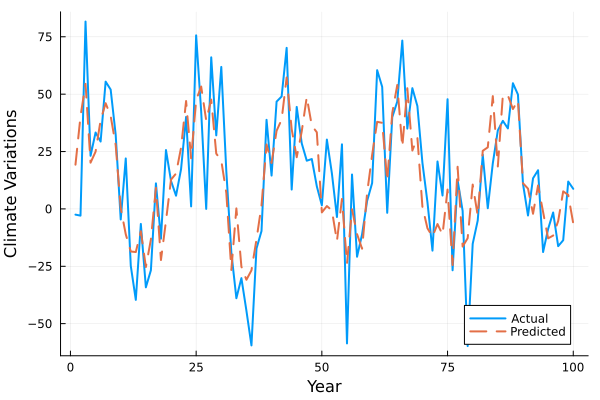

In [24]:
# Creating a plot
plot(data.Year, y, label="Actual", xlabel="Year", ylabel="Climate Variations", linewidth=2)
plot!(data.Year, y_pred, label="Predicted", linestyle=:dash, linewidth=2) 

# Displaying the plot
Plots.display(Plots.plot!())

plot (generic function with 4 methods)